In [30]:
# importações necessaria

from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

# configuração de parametros do grafico
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

# filtro de warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# importação e visualização dos dados

stock = pd.read_csv('./data/all-stocks-2006-01-01-to-2018-01-01.csv',
                     index_col='Date', 
                     parse_dates=['Date'])
stock.head(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM


In [6]:
# apenas ações do 'google'

g_stk = stock.query("Name == 'GOOGL'")
g_stk.head(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL


In [10]:
# coluna ticks, com ordem da serie temporal

g_stk['Ticks'] = range(0, len(g_stk.index.values))
g_stk.head(3)

,Open,High,Low,Close,Volume,Name,Ticks
Date,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2


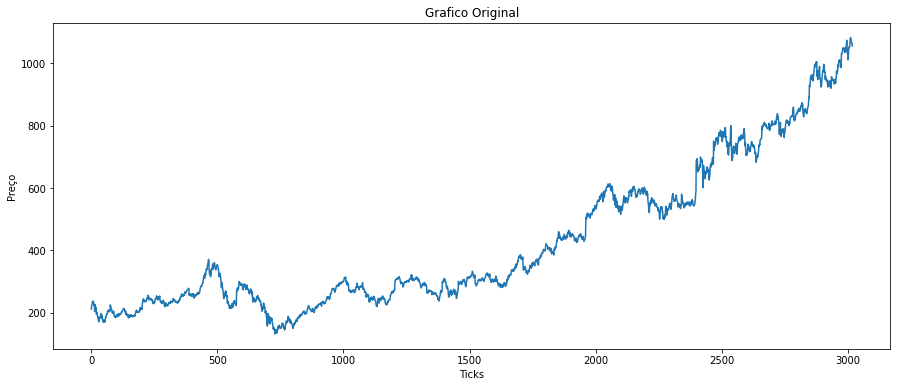

In [13]:
# grafico da ação

fig = plt.figure(1)

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Preço')
ax1.set_title('Grafico Original')
ax1.plot('Ticks', 'Open', data=g_stk);

In [14]:
# média movel de 80 periodos

g_stk['MA']  = g_stk['Open'].rolling(window=80).mean()
g_stk.head(3)

In [15]:
# filtro sem NaN

filter_g = g_stk[(g_stk['Ticks'] >= 900) & (g_stk['Ticks'] <= 1100)]
filter_g.head(3)

,Open,High,Low,Close,Volume,Name,Ticks,MA
Date,,,,,,,,
2009-07-31,225.21,226.58,221.44,221.75,2861550,GOOGL,900,205.07250
2009-08-03,224.59,227.18,224.04,226.33,2591173,GOOGL,901,205.60575
2009-08-04,224.91,227.23,224.44,227.09,2390098,GOOGL,902,206.10550


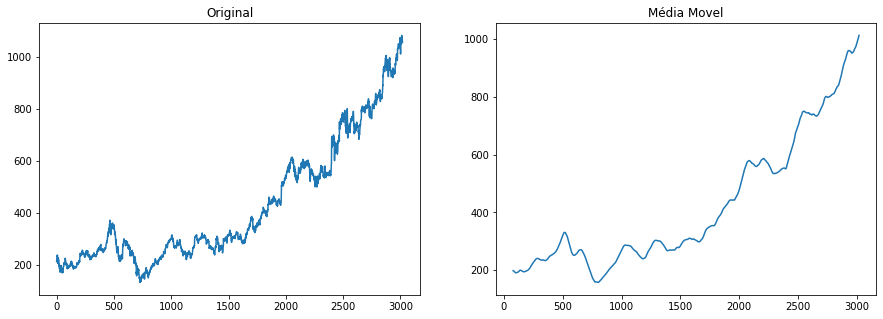

In [20]:
# grafico comparação
# suavisção dos dados

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot('Ticks', 'Open', data=g_stk)
axes[0].set_title('Original')

axes[1].plot('Ticks', 'MA', data=g_stk)
axes[1].set_title('Média Movel');

In [21]:
# suavização exponecial simples

In [29]:
# importando dados

dataparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('./data/AirPassengers.csv', 
                    parse_dates=['Month'], 
                    index_col='Month', 
                    date_parser=dataparse)
data.head(3)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [33]:
# uso do SimpleExpSmoothing

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, 
                                    optimized=False)

#previsão 12meses
fcast1 = fit1.forecast(12).rename(r'$alpha=0.2$')

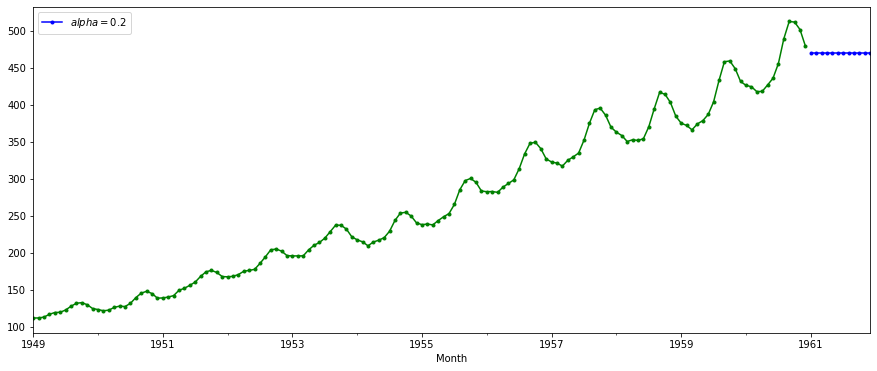

In [35]:
# visualização da previsão

fcast1.plot(marker='.', color='blue', legend=True)
fit1.fittedvalues.plot(marker='.', color='green');

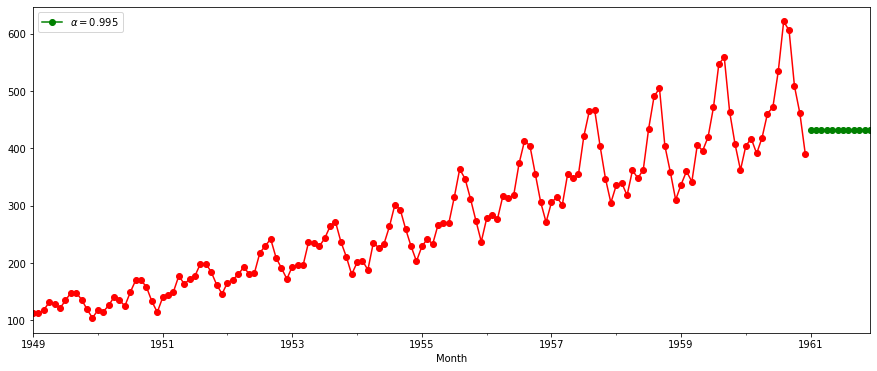

In [41]:
# otmização 

fit3 = SimpleExpSmoothing(data).fit()
fcast3 =fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='red');